In [50]:
%load_ext autoreload
%autoreload 2


from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import embedder_generator as emb_gen
import networkx as nx
import numpy as np
import utilities 

from embedder import Embedder
from embedder import Kernel_GNN
from embedder import Transformer
from umap import UMAP
import dataset_statistics as ds

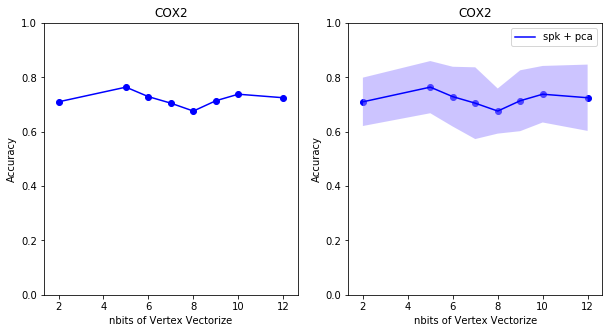

DATASET: 	 COX2


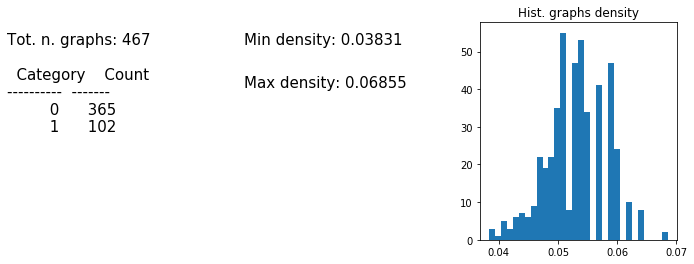

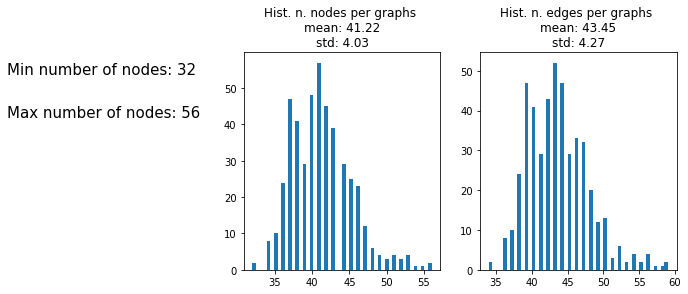

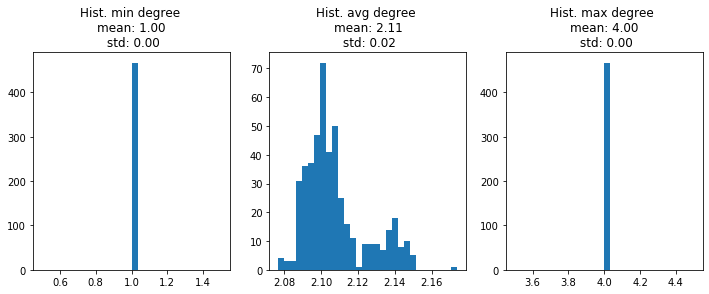

In [71]:
tmp_plot(res_prot,"COX2")
ds.summary("COX2")

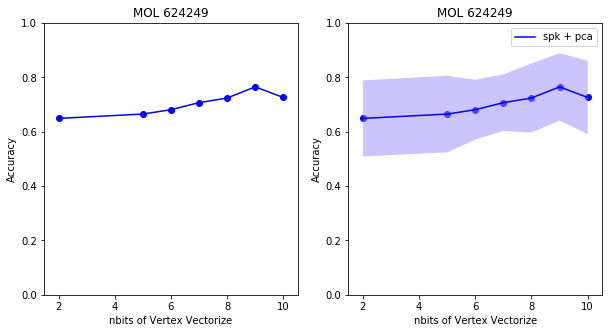

DATASET: 	 624249_pos_neg


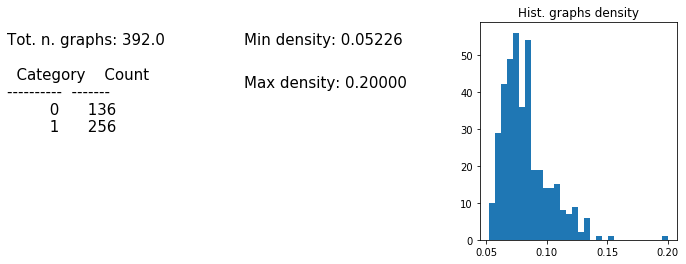

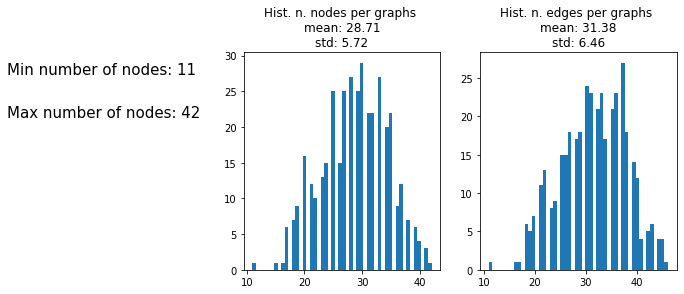

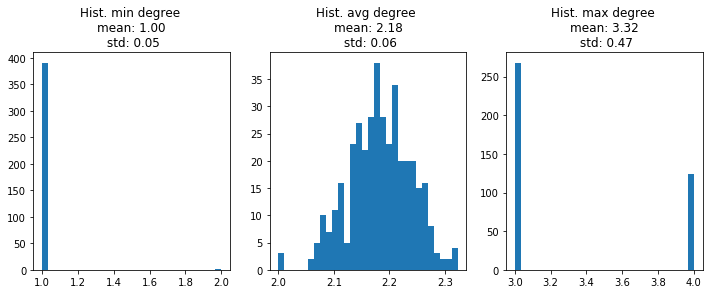

In [73]:
tmp_plot(res_mol,"MOL 624249")
ds.summary("624249_pos_neg",pubchem=True)

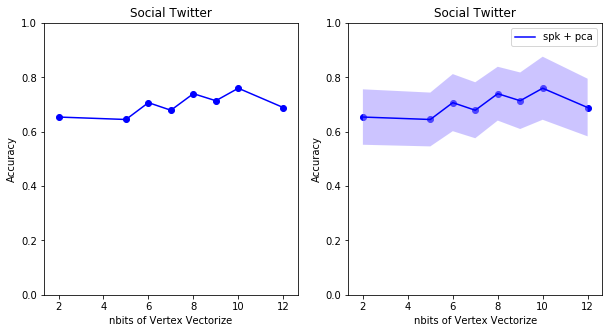

DATASET: 	 TWITTER-Real-Graph-Partial


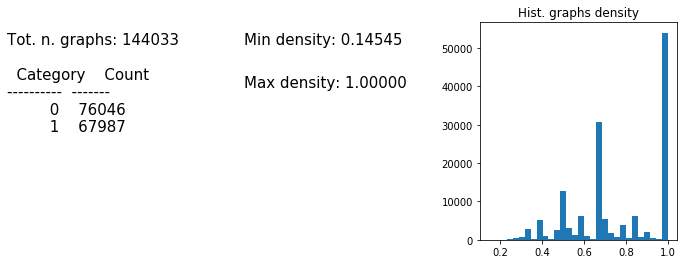

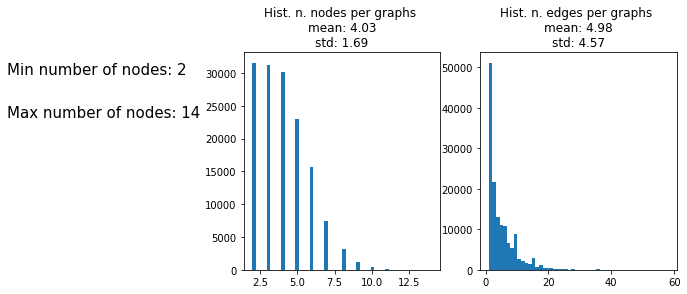

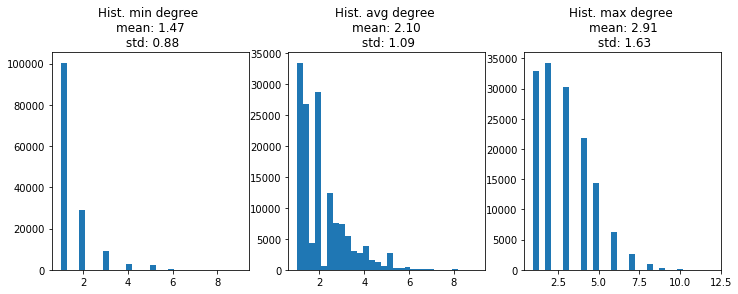

In [82]:
tmp_plot(res_social,"Social Twitter")
ds.summary("TWITTER-Real-Graph-Partial")

In [79]:
bits = [2,5,6,7,8,9,10,12]

In [83]:
#%%time
#res_social = test_nbits(bits)

In [84]:
c = 0
print("RES Twitter")
for r in list(res_social.values()):
    print("\nbit_used: ",bits[c])
    c = c + 1
    r.summary()

RES Twitter

bit_used:  2
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.654  0.102   0.378

bit_used:  5
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.645  0.099   0.372

bit_used:  6
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.707  0.105   0.406

bit_used:  7
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.679  0.103   0.391

bit_used:  8
                         2    STD    mean
--------------------  ----  -----  ------
BASELINE: SpK + UMAP  0.74  0.099    0.42

bit_used:  9
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.714  0.104   0.409

bit_used:  10
                         2    STD    mean
--------------------  ----  -----  ------
BASELINE: SpK + UMAP  0.76  0.116 

In [85]:
c = 0
print("RES Prot. COX2")
for r in list(res_prot.values()):
    print("\nbit_used: ",bits[c])
    c = c + 1
    r.summary()

RES Prot. COX2

bit_used:  2
                         2    STD    mean
--------------------  ----  -----  ------
BASELINE: SpK + UMAP  0.71  0.089   0.399

bit_used:  5
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.764  0.096    0.43

bit_used:  6
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.729   0.11    0.42

bit_used:  7
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.705  0.132   0.418

bit_used:  8
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.676  0.083    0.38

bit_used:  9
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.714  0.112   0.413

bit_used:  10
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.738  

In [86]:
c = 0
print("RES Mol. 624249")
for r in list(res_mol.values()):
    print("\nbit_used: ",bits[c])
    c = c + 1
    r.summary()

RES Mol. 624249

bit_used:  2
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.649   0.14   0.394

bit_used:  5
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.665  0.141   0.403

bit_used:  6
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.681   0.11   0.396

bit_used:  7
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.707  0.104   0.406

bit_used:  8
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.724  0.127   0.426

bit_used:  9
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.765  0.124   0.444

bit_used:  10
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.7

In [68]:
def test_nbits(n_bits):
    
    res = {}
    for i in n_bits:
        vis = execute(i)
        res[i] = vis
        
    return(res)

In [69]:
from datetime import datetime
from keras.callbacks import TensorBoard
import load_data as ld

    
def execute(vec_vet_nbits):
    
    #graphs, labels = load_generated_data_classification("generate_graphs/624249_pos_neg")
    graphs, labels = ld.load_data("TWITTER-Real-Graph-Partial")
    
    for g in graphs:
        for node in g.nodes():
            g.nodes[node]['vec'] = []
    for g in graphs:
        for edge in g.edges():
            g.edges[edge]['vec'] = []
            
            
    graphs = utilities.add_info_to_nodes(graphs,[utilities.vec_vertex],param=vec_vet_nbits)
    max_n_nodes,n_attributes = utilities.find_shapes(graphs)
    
    print("n_attributes: ",n_attributes)
    
    emb = generate_embedder(max_n_nodes,n_attributes)
    
    vis = utilities.repeat_n_times(graphs, labels, [emb] , [2], 3 ,test_size=0.3,seed = 11)
    
    return(vis)

def generate_embedder(max_n_nodes,n_attributes):

    # SpeKtral GNN
    spk_gnn, spk_emb = emb_gen.gen_SpektralGNN_emb(n_classes= 2,
                                                    n_components= 128,
                                                    max_n_nodes= max_n_nodes,
                                                    n_attributes= n_attributes)

    now = datetime.now()
    current_time = now.strftime("%H_%M_%S")
    path = "logs_vect_vert/"+str(current_time)
    tb = TensorBoard(log_dir=path)


    kernel_spk = Kernel_GNN(classificator = spk_gnn,
                           embedder = spk_emb,
                           batch_size = 32,
                           validation_split = 0.2,
                           epochs = 300,
                           patience = 10,
                           callbacks = [tb])
    k1 = Transformer(kernel_spk)

    # umap
    m1 = Transformer(UMAP(n_components = 2))

    # embedder
    emb = Embedder([k1,m1],"BASELINE: SpK + UMAP")
    
    return (emb)

def load_generated_data_classification(path):
    
    graphs = nx.read_gpickle(path+'/'+'graphs.gpickle')    
    labels = list(np.load(path+'/'+'labels.npy'))
   
    return (graphs,labels)

In [70]:
import matplotlib.pyplot as plt
def tmp_plot(res,text):
    a = list(res.keys())
    visualizators = list(res.values())
    
    pos = 1
    spk_baseline = []
    spk_baseline_std = []

    for v in visualizators:
        result_matrix = v.summary(return_matrix=True)

        spk_baseline.append(result_matrix[0][pos])
        spk_baseline_std.append(result_matrix[0][pos+1])
        
        
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title(text)
    plt.plot(a,spk_baseline, label='spk + pca',color='b')
    plt.scatter(a,spk_baseline,color='b')
    plt.ylim([0,1])
    plt.xlabel("nbits of Vertex Vectorize")
    plt.ylabel("Accuracy")
    
    plt.subplot(122)
    plt.title(text)
    plt.plot(a,spk_baseline, label='spk + pca',color='b')
    plt.scatter(a,spk_baseline,color='b')
    low = [spk_baseline[i]-spk_baseline_std[i] for i in range(0,len(spk_baseline))] 
    upp = [spk_baseline[i]+spk_baseline_std[i] for i in range(0,len(spk_baseline))]
    plt.fill_between(a,low,upp, facecolor='#9B8BFF', alpha=0.5)
    plt.ylim([0,1])
    plt.xlabel("nbits of Vertex Vectorize")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
